<a href="https://colab.research.google.com/github/Khempyyy/Food-Retail-Project/blob/main/Food_retail_prj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sys
import pandas as pd
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt
import mlxtend
from mlxtend.frequent_patterns import association_rules, apriori

%config InlineBackend.figure_format='retina'

# ทำ Multi Linear Regression เพื่อทำนายเวลาที่มีการทำธุรกรรมมากที่สุด

In [ ]:
df = pd.read_csv("dh_transactions1.csv")
df.head

<bound method NDFrame.head of                 upc  dollar_sales  units  time_of_transaction  geography  \
0        7680850106          0.80      1                11.00          2   
1        3620000470          3.59      1                11.00          2   
2        1800028064          2.25      1                11.37          2   
3        9999985067          0.85      1                11.48          2   
4        9999985131          2.19      1                13.23          2   
...             ...           ...    ...                  ...        ...   
1048570  1510000011          2.35      1                13.07          2   
1048571  3620000489          0.99      1                13.07          2   
1048572  9999971309          2.00      2                14.10          2   
1048573  3620000250          1.98      2                14.15          2   
1048574  3620000350          1.98      2                14.15          2   

         week  household  store  basket  day  coupon  
0 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 11 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   upc                  1048575 non-null  int64  
 1   dollar_sales         1048575 non-null  float64
 2   units                1048575 non-null  int64  
 3   time_of_transaction  1048575 non-null  float64
 4   geography            1048575 non-null  int64  
 5   week                 1048575 non-null  int64  
 6   household            1048575 non-null  int64  
 7   store                1048575 non-null  int64  
 8   basket               1048575 non-null  int64  
 9   day                  1048575 non-null  int64  
 10  coupon               1048575 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 88.0 MB


In [ ]:
!pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
X = df[['units','basket','dollar_sales']]
y = df['time_of_transaction']

In [ ]:
lrm = LinearRegression()
lrm.fit(X, y)

LinearRegression()

In [ ]:
lrm.intercept_

15.5305292947266

In [ ]:
lrm.coef_

array([-9.98912460e-02, -4.18440638e-08,  1.90295701e-02])

In [ ]:
predictions = lrm.predict(X)
predictions

array([15.44586166, 15.49895416, 15.4734545 , ..., 15.34096085,
       15.34058022, 15.34058022])

In [ ]:
np.mean(predictions)

15.431651384021157

จากการนำข้อมูล units basket dollar_sales และ time_of_transaction มาทำการ Multi Linear Regression จะพบว่าค่า predictions ของ time of transaction เฉลี่ยนั้นคือ 15.432 นาฬิกา ซึ่งเป็นเวลาที่ทำนายว่าจะมีการทำธุรกรรมมากที่สุดในแต่ละวัน 

# Linear Regression เพื่อทำนายเวลาที่มีการทำธุรกรรมมากที่สุด

dollar_sales กับ time_of_transaction

In [ ]:
x = df[['dollar_sales']]
y = df['time_of_transaction']

In [ ]:
lrm = LinearRegression()
lrm.fit(x, y)

LinearRegression()

In [ ]:
lrm.intercept_

15.435798133040455

In [ ]:
lrm.coef_

array([-0.00233782])

In [ ]:
predictions = lrm.predict(x)
predictions

array([15.43392788, 15.42740536, 15.43053804, ..., 15.43112249,
       15.43116925, 15.43116925])

In [ ]:
np.mean(predictions)

15.431651384021166

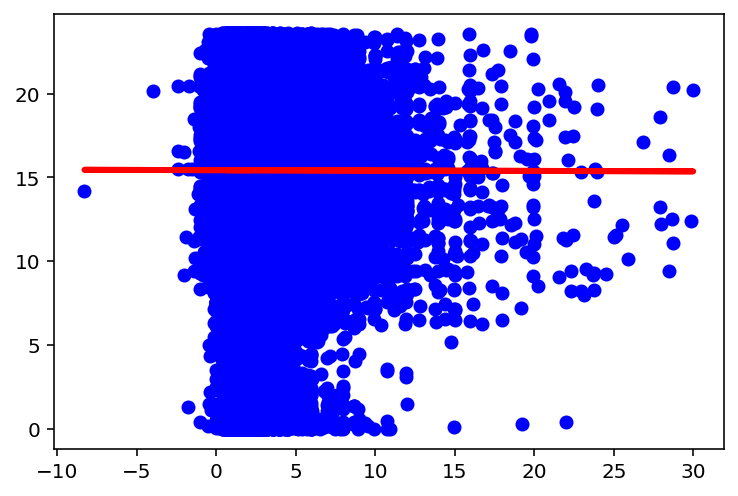

In [ ]:
plt.scatter(x, y, color='blue')
plt.plot(x ,predictions, color='red', linewidth=3)

จากการทำ Linear Regression ของค่า dollar_sales กับ time of transaction จะพบว่าเส้น Linear นั้น อยู่ที่ประมาณ 15.40 นาฬิกา ค่าเฉลี่ยของค่า prediction มีค่า 15.432 นาฬิกา ค่าจุดตัดแกน y มีค่า 15.436 นาฬิกา ค่า coefficient มีค่า -0.00233782

ีunits กับ time_of_transaction

In [ ]:
x = df[['units']]
y = df['time_of_transaction']

In [ ]:
lrm = LinearRegression()
lrm.fit(x, y)

LinearRegression()

In [ ]:
lrm.intercept_

15.530238869559616

In [ ]:
lrm.coef_

array([-0.08297738])

In [ ]:
predictions = lrm.predict(x)
predictions

array([15.44726149, 15.44726149, 15.44726149, ..., 15.36428411,
       15.36428411, 15.36428411])

In [ ]:
np.mean(predictions)

15.431651384021164

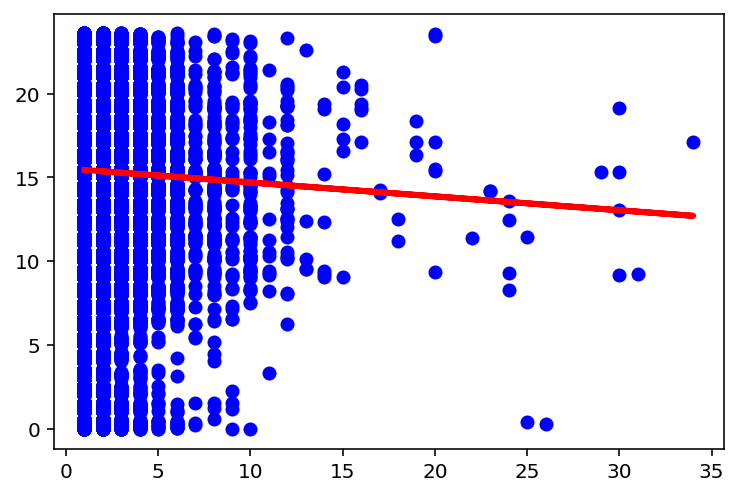

In [ ]:
plt.scatter(x, y, color='blue')
plt.plot(x ,predictions, color='red', linewidth=3)

จากการทำ Linear Regression ของค่า dollar_sales กับ time of transaction จะพบว่าเส้น Linear นั้น อยู่ที่ประมาณ 15.40 นาฬิกา ค่าเฉลี่ยของค่า prediction อยู่ที่ 15.432 นาฬิกา ค่าจุดตัดแกน y มีค่า 15.53 นาฬิกา ค่า coefficient มีค่า -0.08297738

basket กับ time_of_transaction

In [ ]:
x = df[['basket']]
y = df['time_of_transaction']

In [ ]:
lrm = LinearRegression()
lrm.fit(x, y)

LinearRegression()

In [ ]:
lrm.intercept_

15.447364751811701

In [ ]:
lrm.coef_

array([-4.71378719e-08])

In [ ]:
predictions = lrm.predict(x)
predictions

array([15.4473647 , 15.4473647 , 15.44736466, ..., 15.4159969 ,
       15.41599685, 15.41599685])

In [ ]:
np.mean(predictions)

15.431651384021164

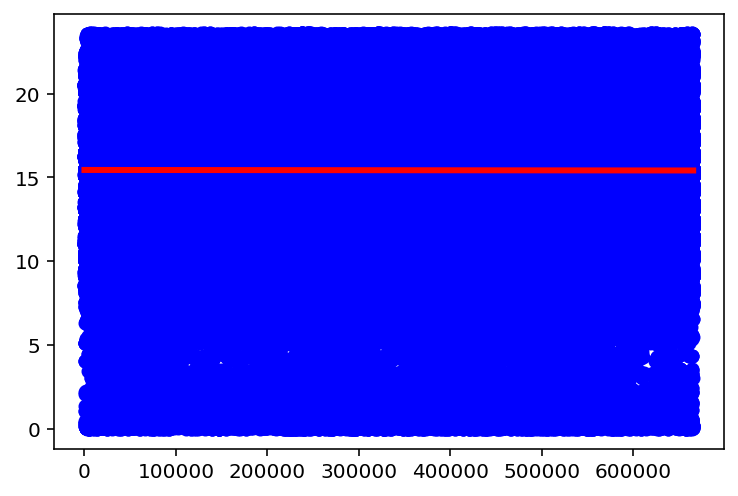

In [ ]:
plt.scatter(x, y, color='blue')
plt.plot(x ,predictions, color='red', linewidth=3)

จากการทำ Linear Regression ของค่า dollar_sales กับ time of transaction จะพบว่าเส้น Linear นั้น อยู่ที่ประมาณ 15.40 นาฬิกา ค่าเฉลี่ยของค่า prediction มีค่า 15.432 นาฬิกา ค่าจุดตัดแกน y มีค่า 15.45 นาฬิกา ค่า coefficient มีค่า่ -4.71378719e-08

# Market Basket Analysis เพื่อการจัดวางของในร้านหรือการทำโปรโมชั่นสินค้า





In [ ]:
df = pd.read_csv("dh_transactions1.csv")
df.head

<bound method NDFrame.head of                 upc  dollar_sales  units  time_of_transaction  geography  \
0        7680850106          0.80      1                11.00          2   
1        3620000470          3.59      1                11.00          2   
2        1800028064          2.25      1                11.37          2   
3        9999985067          0.85      1                11.48          2   
4        9999985131          2.19      1                13.23          2   
...             ...           ...    ...                  ...        ...   
1048570  1510000011          2.35      1                13.07          2   
1048571  3620000489          0.99      1                13.07          2   
1048572  9999971309          2.00      2                14.10          2   
1048573  3620000250          1.98      2                14.15          2   
1048574  3620000350          1.98      2                14.15          2   

         week  household  store  basket  day  coupon  
0 

In [ ]:
df = df.drop(['time_of_transaction'], axis = 1)
df = df.drop(['geography'], axis = 1)
df = df.drop(['week'], axis = 1)
df = df.drop(['household'], axis = 1)
df = df.drop(['store'], axis = 1)
df = df.drop(['day'], axis = 1)
df = df.drop(['coupon'], axis = 1)
df = df.drop(['dollar_sales'], axis = 1)
df = df.drop(['units'], axis = 1)
df

,upc,basket
0,7680850106,1
1,3620000470,1
2,1800028064,2
3,9999985067,3
4,9999985131,4
...,...,...
1048570,1510000011,665448
1048571,3620000489,665448
1048572,9999971309,665449
1048573,3620000250,665450


In [ ]:
df1=df.drop(df.index[490000:])
df1

,upc,basket
0,7680850106,1
1,3620000470,1
2,1800028064,2
3,9999985067,3
4,9999985131,4
...,...,...
489995,3620000468,311476
489996,9999981583,311477
489997,7130000008,311477
489998,9999981580,311477


ผมต้อง rows ออกเนื่องจากเครื่องผมสามารถรันได้ถึงแค่ 490000 rows

In [ ]:
data = pd.crosstab(df1['basket'], df1['upc'])
data

upc,566300023,566300028,566300029,566300035,601011292,601011293,601011294,601011295,601011296,601011297,...,9999985134,9999985137,9999985165,9999985215,9999985216,9999985217,9999985260,9999985261,9999985488,9999985766
basket,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311473,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
311474,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
311475,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
baskets = data.astype(pd.SparseDtype("bool"))
baskets

upc,566300023,566300028,566300029,566300035,601011292,601011293,601011294,601011295,601011296,601011297,...,9999985134,9999985137,9999985165,9999985215,9999985216,9999985217,9999985260,9999985261,9999985488,9999985766
basket,,,,,,,,,,,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311473,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
311474,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
311475,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
baskets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 311477 entries, 1 to 311477
Columns: 712 entries, 566300023 to 9999985766
dtypes: Sparse[bool, False](712)
memory usage: 4.7 MB


In [ ]:
frequent_itemsets = apriori(baskets, min_support = 0.0001, use_colnames = True)
frequent_itemsets['support_n']=frequent_itemsets['support']*len(baskets)
frequent_itemsets.sort_values('support' , ascending=False)

,support,itemsets,support_n
473,0.030587,(9999985020),9527.0
470,0.027280,(9999985004),8497.0
151,0.024968,(3620000250),7777.0
504,0.024056,(9999985068),7493.0
424,0.019603,(9999967727),6106.0
...,...,...,...
1346,0.000103,"(5100002796, 9999985005)",32.0
595,0.000103,"(1510000043, 3620000445)",32.0
558,0.000103,"(9999985051, 1510000007)",32.0
847,0.000103,"(3620000217, 3620000445)",32.0


In [ ]:
# metric = ['support', 'confidence', 'lift', 'leverage', and 'conviction']

# rules = association_rules(frequent_itemsets, metric = "support", min_threshold = .2)
rules = association_rules(frequent_itemsets, metric = "confidence", min_threshold = .0001)
# rules = association_rules(frequent_itemsets, metric = "lift", min_threshold = 1)

# rules.sort_values('lift', ascending = False, inplace = True)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(601011296),(601011292),0.005419,0.004732,0.000308,0.056872,12.017864,0.000283,1.055284
1,(601011292),(601011296),0.004732,0.005419,0.000308,0.065129,12.017864,0.000283,1.063869
2,(601011588),(601011292),0.004488,0.004732,0.000170,0.037911,8.011193,0.000149,1.034486
3,(601011292),(601011588),0.004732,0.004488,0.000170,0.035957,8.011193,0.000149,1.032642
4,(7680828008),(601011292),0.008707,0.004732,0.000109,0.012537,2.649218,0.000068,1.007904
...,...,...,...,...,...,...,...,...,...
2733,"(9999981584, 9999981583)",(9999981585),0.000828,0.006704,0.000260,0.313953,46.833951,0.000254,1.447856
2734,"(9999981585, 9999981583)",(9999981584),0.000979,0.006238,0.000260,0.265574,42.573403,0.000254,1.353113
2735,(9999981584),"(9999981585, 9999981583)",0.006238,0.000979,0.000260,0.041688,42.573403,0.000254,1.042480
2736,(9999981585),"(9999981584, 9999981583)",0.006704,0.000828,0.000260,0.038793,46.833951,0.000254,1.039497


จากตารางข้างต้นซึ่งแสดงค่าต่างๆ ซึ่งค่า support confidence และ lift จะมีความสำคัญต่อการวิเคราห์ ซึ่งจะอธิบายในส่วนถัดไป

In [ ]:
rules.sort_values(by=["support"],inplace=True,ascending=False)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1224,(3620001369),(9999985029),0.010993,0.010880,0.001830,0.166472,15.300144,0.001710,1.186666
1225,(9999985029),(3620001369),0.010880,0.010993,0.001830,0.168191,15.300144,0.001710,1.188984
317,(2700042274),(2700042232),0.010312,0.007358,0.001220,0.118306,16.077534,0.001144,1.125835
316,(2700042232),(2700042274),0.007358,0.010312,0.001220,0.165794,16.077534,0.001144,1.186383
663,(3620000300),(3620000250),0.014784,0.024968,0.001188,0.080347,3.218000,0.000819,1.060218
...,...,...,...,...,...,...,...,...,...
1932,(7680852138),(7680852094),0.001981,0.002228,0.000103,0.051864,23.277232,0.000098,1.052351
2353,(9999985005),(9999985261),0.015093,0.007763,0.000103,0.006807,0.876858,-0.000014,0.999037
2576,"(2700042232, 2700042273)",(2700042239),0.000700,0.008569,0.000103,0.146789,17.130534,0.000097,1.162000
720,(3620000250),(9999985028),0.024968,0.004466,0.000103,0.004115,0.921376,-0.000009,0.999647


จากตารางข้างต้นที่ทำการจัดเรียงค่า support แล้วซึ่งค่า support มีความหมายดังนี้ 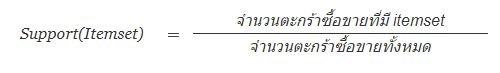

จะพบว่าสินค้ารหัส 3620001369 และ 9999985029 มีค่า support สูงที่สุด แต่ค่า support ไม่เยอะมากเนื่องจากมีการกระจายตัวของสินค้าสูง

In [ ]:
rules.sort_values(by=["confidence"],inplace=True,ascending=False)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2733,"(9999981584, 9999981583)",(9999981585),0.000828,0.006704,0.000260,0.313953,46.833951,0.000254,1.447856
2710,"(9999981585, 9999981581)",(9999981584),0.000787,0.006238,0.000238,0.302041,48.419335,0.000233,1.423811
2709,"(9999981584, 9999981581)",(9999981585),0.000790,0.006704,0.000238,0.300813,44.873723,0.000232,1.420645
2716,"(9999981582, 9999981583)",(9999981584),0.000462,0.006238,0.000135,0.291667,46.756283,0.000132,1.402958
2698,"(9999981581, 9999981583)",(9999981584),0.000597,0.006238,0.000173,0.290323,46.540816,0.000170,1.400301
...,...,...,...,...,...,...,...,...,...
2139,(9999985020),(9999971308),0.030587,0.002251,0.000109,0.003569,1.585735,0.000040,1.001323
35,(9999985020),(601011296),0.030587,0.005419,0.000106,0.003464,0.639163,-0.000060,0.998038
2058,(9999985020),(9999968191),0.030587,0.002132,0.000103,0.003359,1.575621,0.000038,1.001231
585,(9999985020),(3000005970),0.030587,0.009837,0.000103,0.003359,0.341453,-0.000198,0.993500


จากตารางข้างต้นที่ทำการจัดเรียงค่า confidence แล้วซึ่งค่า confidence มีความหมายดังนี้ 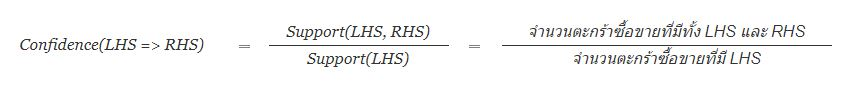

ซึ่ง Confidence เป็นตัววัดประสิทธิภาพสำหรับ association rule

จะพบว่าสินค้ารหัส 9999981584, 9999981583 และ 9999981585 ให้ค่า confidence มากที่สุด

In [ ]:
rules.sort_values(by=["lift"],inplace=True,ascending=False)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1926,(7680851697),(7680851699),0.000918,0.000539,0.000128,0.139860,259.304862,0.000128,1.161975
1927,(7680851699),(7680851697),0.000539,0.000918,0.000128,0.238095,259.304862,0.000128,1.311295
1928,(7680851698),(7680851699),0.000979,0.000539,0.000103,0.104918,194.521155,0.000102,1.116614
1929,(7680851699),(7680851698),0.000539,0.000979,0.000103,0.190476,194.521155,0.000102,1.234085
1924,(7680851697),(7680851698),0.000918,0.000979,0.000157,0.171329,174.967018,0.000156,1.205569
...,...,...,...,...,...,...,...,...,...
62,(9999985020),(1510000007),0.030587,0.011079,0.000112,0.003674,0.331583,-0.000227,0.992567
2310,(9999985001),(9999985020),0.017256,0.030587,0.000161,0.009302,0.304131,-0.000367,0.978516
2311,(9999985020),(9999985001),0.030587,0.017256,0.000161,0.005248,0.304131,-0.000367,0.987928
1557,(9999967727),(5100002549),0.019603,0.018881,0.000112,0.005732,0.303589,-0.000258,0.986775


จากตารางข้างต้นที่ทำการจัดเรียงค่า lift แล้วซึ่งค่า lift มีความหมายดังนี้ 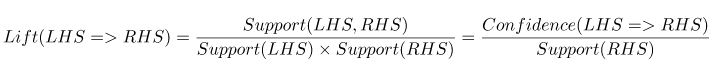

Lift เป็นตัววัดประสิทธิภาพสำหรับ association rule ที่ทำการเปรียบเทียบ ความน่าจะเป็นที่จะพบกลุ่มของสินค้า RHS ในตะกร้าที่มีการซื้อขายกลุ่มของสินค้า LHS กับ ความน่าจะเป็นที่จะพบกลุ่มของสินค้า RHS ในตะกร้าทั้งหมด

พบว่าสินค้ารหัส 7680851697 และ 7680851699 มีค่า lift มากที่สุด

# clean some data 


In [ ]:
df = pd.read_excel("dh_product_lookup_c.xlsx")
df.head()

,upc,product_description,commodity,brand,product_size
0,111112360,VINCENT S ORIG MARINARA S,pasta sauce,Vincent's,25 OZ
1,566300023,PINE MOUNTAIN SYRUP,syrups,Pine Mountain,40 OZ
2,566300028,MILLER CANE SYRUP,syrups,Miller,19 OZ
3,566300029,MILLER CANE SYRUP,syrups,Miller,12 OZ
4,566300035,PINE MOUNTAIN SYRUP,syrups,Pine Mountain,19 OZ


In [ ]:
df['size'] = df['product_size'].str.replace('[^\d\.]', '')

<ipython-input-87-60191da4347c>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['size'] = df['product_size'].str.replace('[^\d\.]', '')


In [ ]:
df

,upc,product_description,commodity,brand,product_size,size
0,111112360,VINCENT S ORIG MARINARA S,pasta sauce,Vincent's,25 OZ,25
1,566300023,PINE MOUNTAIN SYRUP,syrups,Pine Mountain,40 OZ,40
2,566300028,MILLER CANE SYRUP,syrups,Miller,19 OZ,19
3,566300029,MILLER CANE SYRUP,syrups,Miller,12 OZ,12
4,566300035,PINE MOUNTAIN SYRUP,syrups,Pine Mountain,19 OZ,19
...,...,...,...,...,...,...
922,9999985217,PRIVATE LABEL ALPHABETS,pasta,Private Label,16 OZ,16
923,9999985260,PRIVATE LABEL COMPLETE PANCAKE MIX,pancake mixes,Private Label,32 OZ,32
924,9999985261,PRIVATE LABEL COMPLETE PANCAKE MIX,pancake mixes,Private Label,32 OZ,32
925,9999985488,PRIVATE LABEL ITAL NESTED ANGEL HAIR,pasta,Private Label Premium,16 OZ,16


In [ ]:
df.columns

Index(['upc', 'product_description', 'commodity', 'brand', 'product_size',
       'size'],
      dtype='object')

In [ ]:
df = df.drop(['product_size'], axis = 1)
df['size'].replace('', np.nan, inplace=True)
df = df.dropna()
df['size'] = pd.to_numeric(df['size'])
df.drop(df[df['size'] >= 24000].index, inplace = True)

In [ ]:
df

,upc,product_description,commodity,brand,size
0,111112360,VINCENT S ORIG MARINARA S,pasta sauce,Vincent's,25.0
1,566300023,PINE MOUNTAIN SYRUP,syrups,Pine Mountain,40.0
2,566300028,MILLER CANE SYRUP,syrups,Miller,19.0
3,566300029,MILLER CANE SYRUP,syrups,Miller,12.0
4,566300035,PINE MOUNTAIN SYRUP,syrups,Pine Mountain,19.0
...,...,...,...,...,...
922,9999985217,PRIVATE LABEL ALPHABETS,pasta,Private Label,16.0
923,9999985260,PRIVATE LABEL COMPLETE PANCAKE MIX,pancake mixes,Private Label,32.0
924,9999985261,PRIVATE LABEL COMPLETE PANCAKE MIX,pancake mixes,Private Label,32.0
925,9999985488,PRIVATE LABEL ITAL NESTED ANGEL HAIR,pasta,Private Label Premium,16.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 926
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   upc                  891 non-null    int64  
 1   product_description  891 non-null    object 
 2   commodity            891 non-null    object 
 3   brand                891 non-null    object 
 4   size                 891 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 41.8+ KB


Clean dh_product_lookup_c แล้ว

In [ ]:
df.to_csv(r'dh_product_lookup_clean.csv', index=False, header=True)

print(df)

            upc                   product_description      commodity  \
0     111112360             VINCENT S ORIG MARINARA S    pasta sauce   
1     566300023                   PINE MOUNTAIN SYRUP         syrups   
2     566300028                     MILLER CANE SYRUP         syrups   
3     566300029                     MILLER CANE SYRUP         syrups   
4     566300035                   PINE MOUNTAIN SYRUP         syrups   
..          ...                                   ...            ...   
922  9999985217               PRIVATE LABEL ALPHABETS          pasta   
923  9999985260    PRIVATE LABEL COMPLETE PANCAKE MIX  pancake mixes   
924  9999985261    PRIVATE LABEL COMPLETE PANCAKE MIX  pancake mixes   
925  9999985488  PRIVATE LABEL ITAL NESTED ANGEL HAIR          pasta   
926  9999985766  PRIVATE LABEL ITALIAN TRI COLORE CRE          pasta   

                     brand  size  
0                Vincent's  25.0  
1            Pine Mountain  40.0  
2                   Miller  19